Midterm exam practice

In [28]:
# What is the length in miles of the fourth longest trail in California?

import pandas as pd
df = pd.read_csv("national_park_trails.csv")
df.head()
df_cali = df[df["state_name"]=="California"]
df_cali["length"] = df_cali["length"]/1609
df_cali.sort_values("length", ascending= False).iloc[3]

<positron-console-cell-28>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


trail_id                                                      10418330
name                                                     Big SEKI Loop
area_name                                   Kings Canyon National Park
city_name                                                         Hume
state_name                                                  California
country_name                                             United States
_geoloc                           {'lat': 36.79608, 'lng': -118.58322}
popularity                                                      2.1531
length                                                      145.230682
elevation_gain                                              10944.7584
difficulty_rating                                                    7
route_type                                                        loop
visitor_usage                                                      1.0
avg_rating                                                         5.0
num_re

Consider an “easy” trail to be one that has an elevation gain of less than 500 meters, a distance of less than 5 kilometers, and a difficulty rating below 4.

Which California National Park has the highest average rating of its “easy” trails?

In [2]:
df_cali = df[df["state_name"] == "California"]
cali_easy = df_cali[(df_cali["elevation_gain"]<500) & (df_cali["length"]< 5000) & (df_cali["difficulty_rating"]<4)]
cali_easy.sort_values("avg_rating", ascending= False).iloc[0]

trail_id                                         10024378
name                             Saline Valley Hot Spring
area_name                      Death Valley National Park
city_name                                       Lone Pine
state_name                                     California
country_name                                United States
_geoloc              {'lat': 36.83402, 'lng': -117.73855}
popularity                                         6.1221
length                                            482.802
elevation_gain                                        0.0
difficulty_rating                                       1
route_type                                   out and back
visitor_usage                                         1.0
avg_rating                                            5.0
num_reviews                                             4
features               ['dogs-no', 'kids', 'hot-springs']
activities                          ['hiking', 'walking']
units         

In [5]:
import re

How many National Parks contain the word “Land” somewhere in their name? (if the word appears as part of a longer word, like “Candyland”, this counts too)



In [3]:
names = df["name"]
names =list(names)
# parks = map(lambda x: re.findall(r"[Ll]and", x), names)
# parks = list(parks)
print(names)

['Harding Ice Field Trail', 'Mount Healy Overlook Trail', 'Exit Glacier Trail', 'Horseshoe Lake Trail', 'Triple Lakes Trail', 'Bison Gulch', 'Rock Creek Trail', 'Taiga Trail', 'McKinley Station Trail', 'Mount Thorofare Ridge Loop', 'McKinley Bar Trail', 'Tiaga Loop and Horseshoe Lake Trail to Beaver Dam', 'Blueberry Hill Trail', 'Stampede Trail to Sushana River', 'Bartlett Cove Forest Loop Trail', 'Camp Ridge Trail', 'Jonesville Trail', 'Roadside Trail', 'Quigley Ridge Trail', 'Bison Gulch to Denali Visitors Center', 'Brooks Falls', 'Bartlett River Trail', 'McKinley Station and Morino Loop Trail', 'Dumpling Mountain', 'Spruce Tree Trail', 'Bartlet Lake Trail', 'Eldorado Creek Trail', 'Tlingit Trail', 'Point Gustavus', 'Bright Angel Trail to Bright Angel Campground and River Trail', 'South Kaibab Trail to Cedar Ridge', 'Three-Mile Resthouse via Bright Angel Trail', 'South Kaibab, Phantom Ranch, and Bright Angel Trail Loop ', 'South Kaibab Trail to Ooh Aah Point', 'Grand Canyon Rim Trail

In [6]:
long_string = " , ".join(names)
land = re.findall(r"\w*[Ll]and", long_string)
len(land)

61

In [38]:
import re
# list(map(lambda x: re.findall(r"\b*\w*[Ll]and", x), df["name"]))


error: nothing to repeat at position 2

In [8]:
df.head()

,trail_id,name,area_name,city_name,state_name,country_name,_geoloc,popularity,length,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,features,activities,units
0,10020048,Harding Ice Field Trail,Kenai Fjords National Park,Seward,Alaska,United States,"{'lat': 60.18852, 'lng': -149.63156}",24.8931,15610.598,1161.8976,5,out and back,3.0,5.0,423,"['dogs-no', 'forest', 'river', 'views', 'water...","['birding', 'camping', 'hiking', 'nature-trips...",i
1,10236086,Mount Healy Overlook Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73049, 'lng': -148.91968}",18.0311,6920.162,507.7968,3,out and back,1.0,4.5,260,"['dogs-no', 'forest', 'views', 'wild-flowers',...","['birding', 'camping', 'hiking', 'nature-trips...",i
2,10267857,Exit Glacier Trail,Kenai Fjords National Park,Seward,Alaska,United States,"{'lat': 60.18879, 'lng': -149.631}",17.7821,2896.812,81.9912,1,out and back,3.0,4.5,224,"['dogs-no', 'partially-paved', 'views', 'wildl...","['hiking', 'walking']",i
3,10236076,Horseshoe Lake Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73661, 'lng': -148.915}",16.2674,3379.614,119.7864,1,loop,2.0,4.5,237,"['dogs-no', 'forest', 'lake', 'kids', 'views',...","['birding', 'hiking', 'nature-trips', 'trail-r...",i
4,10236082,Triple Lakes Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73319, 'lng': -148.89682}",12.5935,29772.790,1124.7120,5,out and back,1.0,4.5,110,"['dogs-no', 'lake', 'views', 'wild-flowers', '...","['birding', 'fishing', 'hiking', 'nature-trips...",i


In [ ]:
#i want a column for trail_id, name, and area name, I then want a column for measure which includes the type of score, then a column for score showing the associated score



In [15]:
np_shortened = df.loc[:, ("trail_id", "name", "area_name", "avg_rating", "difficulty_rating", "popularity", "visitor_usage") ]
# np_shortened = df[[("trail_id""name", "area_name", "avg_rating", "difficulty_rating", "popularity", "visitor_usage") ]]

np_shortened

,trail_id,name,area_name,avg_rating,difficulty_rating,popularity,visitor_usage
0,10020048,Harding Ice Field Trail,Kenai Fjords National Park,5.0,5,24.8931,3.0
1,10236086,Mount Healy Overlook Trail,Denali National Park,4.5,3,18.0311,1.0
2,10267857,Exit Glacier Trail,Kenai Fjords National Park,4.5,1,17.7821,3.0
3,10236076,Horseshoe Lake Trail,Denali National Park,4.5,1,16.2674,2.0
4,10236082,Triple Lakes Trail,Denali National Park,4.5,5,12.5935,1.0
...,...,...,...,...,...,...,...
3308,10008302,Silversword Loop Via Halemau'u Trail,Haleakala National Park,4.5,5,9.3861,2.0
3309,10236001,Keonehe'ehe'e Trail,Haleakala National Park,5.0,5,9.1555,2.0
3310,10258707,Red Hill Overlook Summit Trail,Haleakala National Park,4.5,1,8.5066,NaN
3311,10014989,Kaupo Trail,Haleakala National Park,4.0,5,8.3240,1.0


to go to long form, the id_vars = is the unique identifier for each entry
the var_name = is the name for the column containing the type of variable associated with the following value
the value_vars = is the different types of variables that may be found in the variable column
the value_name = is the name of the value column

In [20]:
np_trails_new = np_shortened.melt(id_vars = ["trail_id", "name"], var_name = "measure", value_vars = ["avg_rating", "difficulty_rating", "popularity", "visitor_usage"], value_name= "score" )
np_trails_new

,trail_id,name,measure,score
0,10020048,Harding Ice Field Trail,avg_rating,5.0
1,10236086,Mount Healy Overlook Trail,avg_rating,4.5
2,10267857,Exit Glacier Trail,avg_rating,4.5
3,10236076,Horseshoe Lake Trail,avg_rating,4.5
4,10236082,Triple Lakes Trail,avg_rating,4.5
...,...,...,...,...
13247,10008302,Silversword Loop Via Halemau'u Trail,visitor_usage,2.0
13248,10236001,Keonehe'ehe'e Trail,visitor_usage,2.0
13249,10258707,Red Hill Overlook Summit Trail,visitor_usage,NaN
13250,10014989,Kaupo Trail,visitor_usage,1.0


C:\Users\Davis\anaconda3\Lib\site-packages\plotnine\layer.py:284: PlotnineWarning: stat_density : Removed 253 rows containing non-finite values.


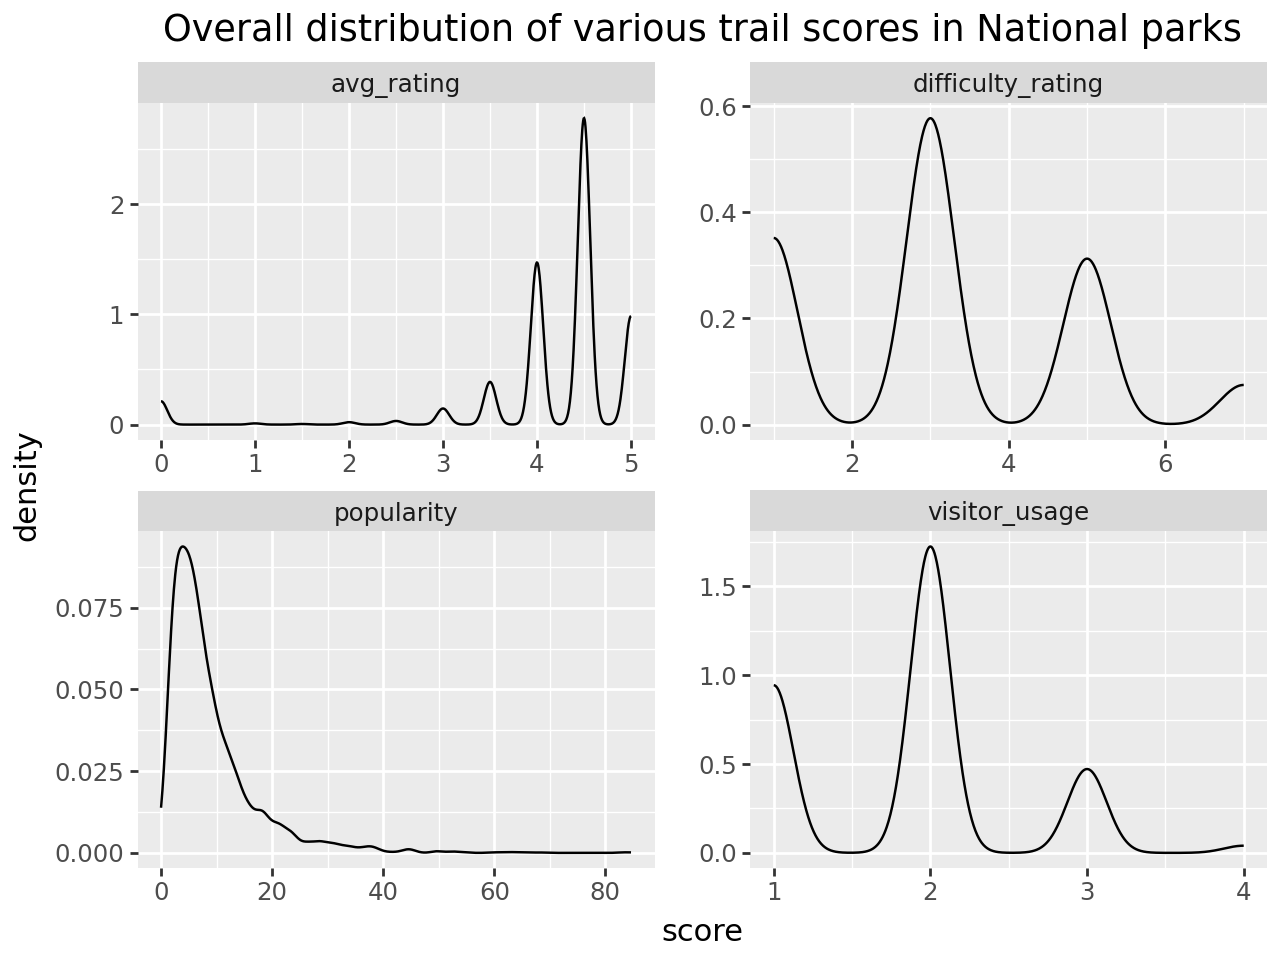

In [21]:
from plotnine import ggplot, aes, geom_density, facet_wrap, ggtitle

(ggplot(np_trails_new, aes(x="score"))
+ geom_density()
+ facet_wrap('~ measure', scales = 'free') 
+ ggtitle("Overall distribution of various trail scores in National parks")
)

In [23]:
ca_parks = df_cali
ca_parks.head(1)

,trail_id,name,area_name,city_name,state_name,country_name,_geoloc,popularity,length,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,features,activities,units
219,10026910,Vernal and Nevada Falls via the Mist Trail,Yosemite National Park,Yosemite Valley,California,United States,"{'lat': 37.73495, 'lng': -119.56619}",68.1488,10299.776,667.8168,3,loop,3.0,5.0,1869,"['dogs-no', 'forest', 'partially-paved', 'rive...","['birding', 'hiking', 'nature-trips', 'walking']",i


C:\Users\Davis\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
C:\Users\Davis\anaconda3\Lib\site-packages\plotnine\layer.py:284: PlotnineWarning: stat_boxplot : Removed 54 rows containing non-finite values.


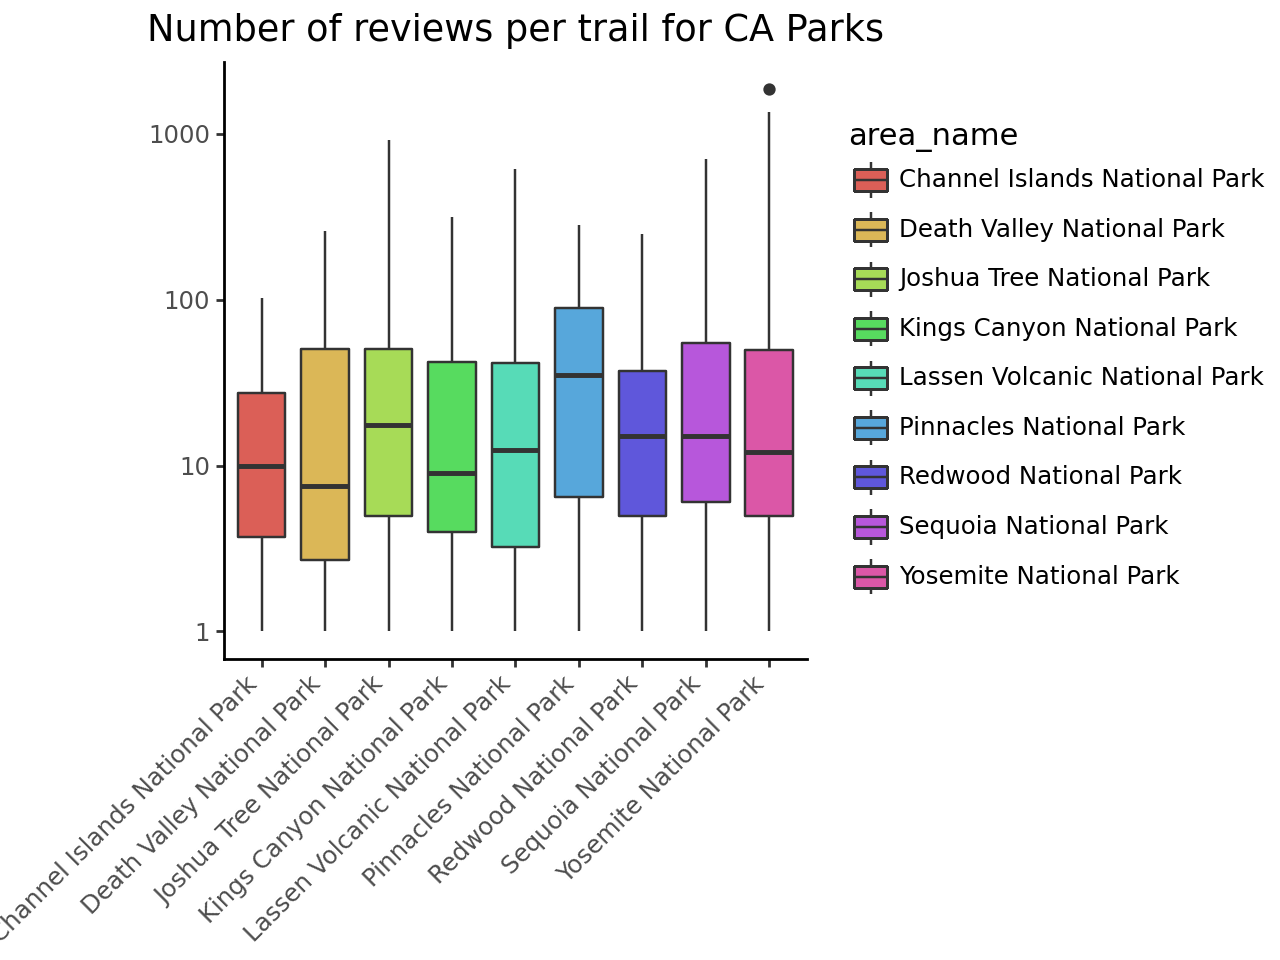

In [27]:
from plotnine import ggplot, geom_boxplot, element_text, theme, labs, scale_y_log10, scale_fill_manual, theme_classic
# from plotnine.scales import _______

(ggplot(ca_parks, aes(x="area_name", y="num_reviews", fill = "area_name"))
+ geom_boxplot()
+ scale_y_log10() 
# + scale_fill_manual(guide=False) #disables the legend
+ labs(
  x = "",
  y = "",
  title = "Number of reviews per trail for CA Parks"
)
+ theme_classic()
+ theme(axis_text_x=element_text(rotation= 45, hjust=1)) 
)